# Testing a Saved Agent

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [ ]:
# when running in Udacity workspace
!pip -q install ./python

In [ ]:
from agent import Agent
from collections import deque
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import torch
from unityagents import UnityEnvironment

%matplotlib inline

In [ ]:
## when running locally
env = UnityEnvironment(file_name='Tennis.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [ ]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

---
### Test a saved agent

In [ ]:
CONSEC_EPISODES = 10
PRINT_EVERY = 1
ADD_NOISE = False

In [ ]:
## reinitialize the agents (if needed)
agent_0 = Agent(state_size, action_size, num_agents=1, random_seed=0)
agent_1 = Agent(state_size, action_size, num_agents=1, random_seed=0)

# load the weights from file
agent_0_weights = 'ckpt_actor_0.pth'
agent_1_weights = 'ckpt_actor_1.pth'
agent_0.actor_local.load_state_dict(torch.load(agent_0_weights))
agent_1.actor_local.load_state_dict(torch.load(agent_1_weights))     

In [ ]:
def test(n_episodes=10, max_t=1000, train_mode=False):

    scores_window = deque(maxlen=CONSEC_EPISODES)
    scores_all = []
    moving_average = []  

    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train_mode)[brain_name]         # reset the environment
        states = np.reshape(env_info.vector_observations, (1,48)) # get states and combine them
        scores = np.zeros(num_agents)
        while True:
            actions = get_actions(states, ADD_NOISE)           # choose agent actions and combine them
            env_info = env.step(actions)[brain_name]           # send both agents' actions together to the environment
            next_states = np.reshape(env_info.vector_observations, (1, 48)) # combine the agent next states
            rewards = env_info.rewards                         # get reward
            done = env_info.local_done                         # see if episode finished
            scores += np.max(rewards)                          # update the score for each agent
            states = next_states                               # roll over states to next time step
            if np.any(done):                                   # exit loop if episode finished
                break

        ep_best_score = np.max(scores)
        scores_window.append(ep_best_score)
        scores_all.append(ep_best_score)
        moving_average.append(np.mean(scores_window))

        # print results
        if i_episode % PRINT_EVERY == 0:
            print('Episodes {:0>4d}-{:0>4d}\tMax Reward: {:.3f}\tMoving Average: {:.3f}'.format(
                i_episode-PRINT_EVERY, i_episode, np.max(scores_all[-PRINT_EVERY:]), moving_average[-1]))
            
    return scores_all, moving_average            

In [ ]:
scores, avgs = test()

Episodes 0000-0001	Max Reward: 5.200	Moving Average: 5.200
Episodes 0001-0002	Max Reward: 0.000	Moving Average: 2.600
Episodes 0002-0003	Max Reward: 5.200	Moving Average: 3.467
Episodes 0003-0004	Max Reward: 0.000	Moving Average: 2.600
Episodes 0004-0005	Max Reward: 0.000	Moving Average: 2.080
Episodes 0005-0006	Max Reward: 0.400	Moving Average: 1.800
Episodes 0006-0007	Max Reward: 5.200	Moving Average: 2.286
Episodes 0007-0008	Max Reward: 0.000	Moving Average: 2.000
Episodes 0008-0009	Max Reward: 0.100	Moving Average: 1.789
Episodes 0009-0010	Max Reward: 5.200	Moving Average: 2.130


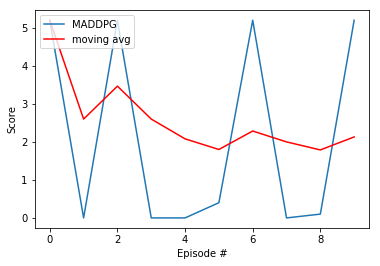

In [ ]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='MADDPG')
plt.plot(np.arange(len(scores)), avgs, c='r', label='moving avg')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

When finished, you can close the environment.

In [ ]:
env.close()